In [ ]:
pip list

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [37]:
df = pd.read_csv('airline-passengers.csv')

In [38]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: xlabel='Month'>

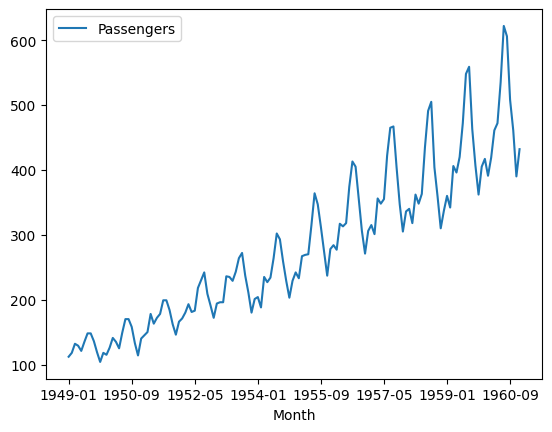

In [10]:
df.plot(x="Month", y="Passengers")

In [11]:
df.shape

(144, 2)

In [42]:
training_set=df.iloc[:120,1:2]
test_set=df.iloc[120:,1:2]

In [43]:
training_set

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
115,505
116,404
117,359
118,310


In [13]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform()

In [15]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [21]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

2023-06-08 01:08:27.436559: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 01:08:27.474146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 01:08:27.474931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 01:08:28.119868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
training_set = df.iloc[:120, 1:2].values
test_set = df.iloc[120:, 1:2].values

In [24]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 120):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [26]:

xtrainbaru = np.reshape(X_train, (115, 5))

In [32]:
df = pd.DataFrame(xtrainbaru,columns=[1,2,3,4,"target"])

In [36]:
df

,1,2,3,4,target
0,0.019950,0.034913,0.069825,0.062344,0.042394
1,0.034913,0.069825,0.062344,0.042394,0.077307
2,0.069825,0.062344,0.042394,0.077307,0.109726
3,0.062344,0.042394,0.077307,0.109726,0.109726
4,0.042394,0.077307,0.109726,0.109726,0.079800
...,...,...,...,...,...
110,0.643392,0.608479,0.645885,0.825436,0.965087
111,0.608479,0.645885,0.825436,0.965087,1.000000
112,0.645885,0.825436,0.965087,1.000000,0.748130
113,0.825436,0.965087,1.000000,0.748130,0.635910


In [33]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)

In [44]:
training_set

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
115,505
116,404
117,359
118,310


In [45]:
dataset_test = df.iloc[120:, 1:2]
dataset_total = pd.concat((training_set, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 5:].values

In [46]:
inputs = inputs.reshape(-1,1)

In [47]:
inputs

array([[505],
       [404],
       [359],
       [310],
       [337],
       [360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508],
       [461],
       [390],
       [432]])

In [48]:
inputs =sc.fit_transform(inputs)
X_test = []
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(19, 5, 1)


In [50]:
xtestbaru = np.reshape(X_test, (19, 5))
xtestbaru

array([[0.625     , 0.30128205, 0.15705128, 0.        , 0.08653846],
       [0.30128205, 0.15705128, 0.        , 0.08653846, 0.16025641],
       [0.15705128, 0.        , 0.08653846, 0.16025641, 0.1025641 ],
       [0.        , 0.08653846, 0.16025641, 0.1025641 , 0.30769231],
       [0.08653846, 0.16025641, 0.1025641 , 0.30769231, 0.27564103],
       [0.16025641, 0.1025641 , 0.30769231, 0.27564103, 0.3525641 ],
       [0.1025641 , 0.30769231, 0.27564103, 0.3525641 , 0.51923077],
       [0.30769231, 0.27564103, 0.3525641 , 0.51923077, 0.76282051],
       [0.27564103, 0.3525641 , 0.51923077, 0.76282051, 0.79807692],
       [0.3525641 , 0.51923077, 0.76282051, 0.79807692, 0.49038462],
       [0.51923077, 0.76282051, 0.79807692, 0.49038462, 0.31089744],
       [0.76282051, 0.79807692, 0.49038462, 0.31089744, 0.16666667],
       [0.79807692, 0.49038462, 0.31089744, 0.16666667, 0.30448718],
       [0.49038462, 0.31089744, 0.16666667, 0.30448718, 0.34294872],
       [0.31089744, 0.16666667, 0.

In [51]:
predicted_pakan = modelknn.predict(xtestbaru)

predicted_pakan = predicted_pakan.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pakan)
dataset_test=dataset_test.iloc[0:19]

In [52]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.11118374771317968

In [53]:
dataset_test=dataset_test.to_numpy()

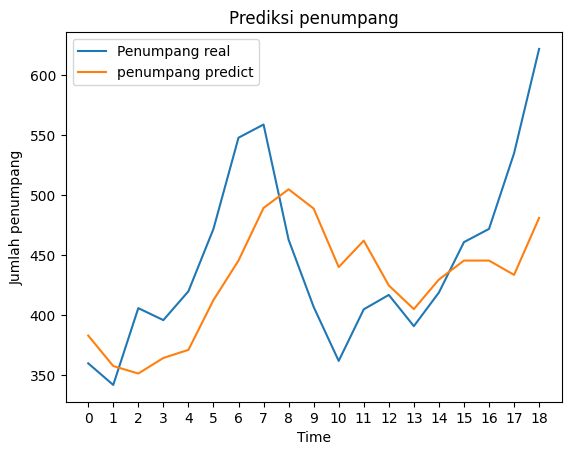

In [55]:
import matplotlib.pyplot as plt
plt.plot(dataset_test,label = 'Penumpang real')
plt.plot(prediksi,label = 'penumpang predict')
plt.xticks(np.arange(0,19,1))
plt.title('Prediksi penumpang')
plt.xlabel('Time')
plt.ylabel('Jumlah penumpang')
plt.legend()
plt.show()

plt.show()